# UIP puzzle - Europe-U.S.

In [77]:
import os

In [2]:
# Import libraries
!pip install pandas openpyxl
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

## Nominal FX data

Currency Conversions: US Dollar Exchange Rate: Average of Daily Rates: National Currency: USD for Euro Area (19 Countries) (CCUSMA02EZM618N) - https://fred.stlouisfed.org/series/CCUSMA02EZM618N 

In [5]:
# !!! - Careful FRED data saved in weird format! Need to save locally to .xlsx

# Read nominal FX (US for EUR) data
Nominal_USEUR_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/NominalFX_USDforEUR_monthly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
Nominal_USEUR_monthly.columns = ['Date', 'Nominal_FX']

# Convert date column to datetime format
Nominal_USEUR_monthly['Date'] = pd.to_datetime(Nominal_USEUR_monthly['Date'])

# Set the date column as the index
Nominal_USEUR_monthly.set_index('Date', inplace = True)

Nominal_USEUR_monthly.head()


,Nominal_FX
Date,
1990-01-01,0.8319
1990-02-01,0.8208
1990-03-01,0.8351
1990-04-01,0.8251
1990-05-01,0.8114


<Axes: xlabel='Date'>

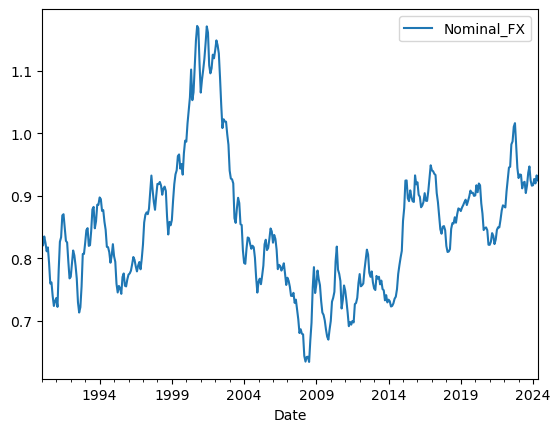

In [6]:
Nominal_USEUR_monthly.plot()

## Euro interest rate data

Yield curve spot rate, 1-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition), Euro area (changing composition), Daily - businessweek - https://data.ecb.europa.eu/data/datasets/YC/YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_1Y?chart_props=W3sibm9kZUlkIjoiMTg5NTQ4NiIsInByb3BlcnRpZXMiOlt7ImNvbG9ySGV4IjoiIiwiY29sb3JUeXBlIjoiIiwiY2hhcnRUeXBlIjoibGluZWNoYXJ0IiwibGluZVN0eWxlIjoiU29saWQiLCJsaW5lV2lkdGgiOiIxLjUiLCJheGlzUG9zaXRpb24iOiJsZWZ0Iiwib2JzZXJ2YXRpb25WYWx1ZSI6ZmFsc2UsImRhdGVzIjpbIjE5OTktMTEtMzBUMjM6MDA6MDAuMDAwWiIsIjIwMjQtMDYtMjNUMjI6MDA6MDAuMDAwWiJdLCJpc1RkYXRhIjp0cnVlLCJtb2RpZmllZFVuaXRUeXBlIjoibm9uZSIsInllYXIiOiJmdWxsUmFuZ2UiLCJzdGFydERhdGUiOiIyMDA0LTA5LTMwIiwiZW5kRGF0ZSI6IjIwMjQtMDYtMjQiLCJzZXREYXRlIjp0cnVlLCJzaG93VGFibGVEYXRhIjpmYWxzZSwiY2hhbmdlTW9kZSI6ZmFsc2UsInNob3dNZW51U3R5bGVDaGFydCI6ZmFsc2UsImRpc3BsYXlNb2JpbGVDaGFydCI6dHJ1ZSwic2NyZWVuU2l6ZSI6Im1heCIsInNjcmVlbldpZHRoIjo3NTYsInNob3dUZGF0YSI6ZmFsc2UsInRyYW5zZm9ybWVkRnJlcXVlbmN5IjoibW9udGhseSIsInRyYW5zZm9ybWVkVW5pdCI6Im5vbmUiLCJmcmVxdWVuY3kiOiJtb250aGx5IiwidW5pdCI6Im5vbmUiLCJtb2RpZmllZCI6InRydWUiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6Im1vbnRobHkiLCJpbnRpYWxTZXJpZXNGcmVxdWVuY3kiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsIm1ldGFkYXRhRGVjaW1hbCI6IjYiLCJpc1RhYmxlU29ydGVkIjpmYWxzZSwiaXNZZWFybHlUZGF0YSI6dHJ1ZSwicmVzcG9uc2VEYXRhRW5kRGF0ZSI6IiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjpmYWxzZSwiZGF0ZVBpY2tlckVuZERhdGUiOiIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjpmYWxzZSwic2VyaWVza2V5U2V0IjoiWUMuQi5VMi5FVVIuNEYuR19OX0EuU1ZfQ19ZTS5TUl8xWXwxMjV8bm9uZXxtb250aGx5fG5vbmV8TW9udGhseSIsImRhdGFzZXRJZCI6IjEyNSIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjpmYWxzZSwiaXNTbGlkZXJEYXRhIjp0cnVlLCJpc0luaXRpYWxDaGFydERhdGFGcm9tR3JhcGgiOnRydWUsImNoYXJ0U2VyaWVzS2V5IjoiWUMuQi5VMi5FVVIuNEYuR19OX0EuU1ZfQ19ZTS5TUl8xWSIsInR5cGVPZiI6IiJ9XX1d

Note: downloading monthly data leads to a lot of NaNs

In [9]:
# Read nominal FX (US for EUR) data
Euro_1Y_daily = pd.read_csv('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/1Y_Yield_Europe_daily_ECB.csv')

# Drop unnecessary columns
Euro_1Y_daily = Euro_1Y_daily.drop(columns=['TIME PERIOD'])

Euro_1Y_daily.columns = ['Date', 'Euro_1Y']

# Convert date column to datetime format
Euro_1Y_daily['Date'] = pd.to_datetime(Euro_1Y_daily['Date'])

# Set the date column as the index
Euro_1Y_daily.set_index('Date', inplace = True)

# Resample the data to monthly frequency and apply mean aggregation
Euro_1Y_monthly = Euro_1Y_daily.resample('MS').mean()

In [10]:
Euro_1Y_monthly.head()

,Euro_1Y
Date,
2004-09-01,2.291667
2004-10-01,2.217036
2004-11-01,2.208084
2004-12-01,2.192681
2005-01-01,2.195882


<Axes: xlabel='Date'>

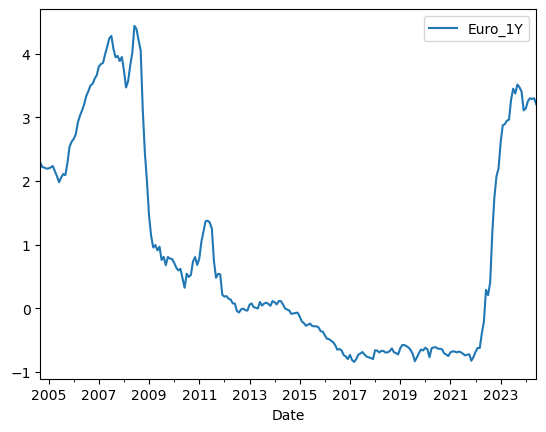

In [11]:
Euro_1Y_monthly.plot()

Yield curve spot rate, 3-month maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition), Euro area (changing composition), Daily - businessweek - https://data.ecb.europa.eu/data/datasets/YC/YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_3M

In [13]:
# Read nominal FX (US for EUR) data
Euro_3m_daily = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/3m_Yield_Europe_daily_ECB.xlsx',
                             skiprows = 1)

# Drop unnecessary columns
Euro_3m_daily = Euro_3m_daily.drop(columns=['TIME PERIOD'])

# Rename columns
Euro_3m_daily.columns = ['Date', 'Euro_3m']

# Convert date column to datetime format
Euro_3m_daily['Date'] = pd.to_datetime(Euro_3m_daily['Date'])

# Set the date column as the index
Euro_3m_daily.set_index('Date', inplace = True)

# Resample the data to monthly frequency (choose month start to match FRED) and apply mean aggregation
Euro_3m_monthly = Euro_3m_daily.resample('MS').mean()

In [122]:
Euro_3m_monthly.tail()

,Euro_3m
Date,
2024-02-01,3.846436
2024-03-01,3.806018
2024-04-01,3.742667
2024-05-01,3.673476
2024-06-01,3.540902


<Axes: xlabel='Date'>

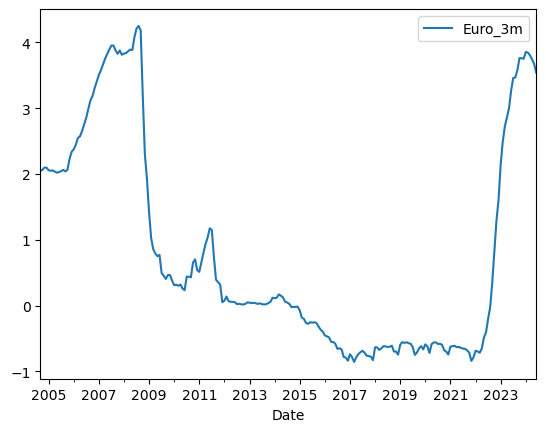

In [15]:
Euro_3m_monthly.plot()

## U.S. interest rate data

3-Month Treasury Bill Secondary Market Rate, Discount Basis (TB3MS) - https://fred.stlouisfed.org/series/TB3MS

In [18]:
# Careful FRED data saved in weird format! Need to save locally to xlsx

# Read nominal FX (US for EUR) data
UST_3m_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/3Month_UST_monthly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
UST_3m_monthly.columns = ['Date', 'UST_3m']

# Convert date column to datetime format
UST_3m_monthly['Date'] = pd.to_datetime(UST_3m_monthly['Date'])

# Set the date column as the index
UST_3m_monthly.set_index('Date', inplace = True)

UST_3m_monthly.tail()

,UST_3m
Date,
2024-01-01,5.22
2024-02-01,5.24
2024-03-01,5.24
2024-04-01,5.24
2024-05-01,5.25


<Axes: xlabel='Date'>

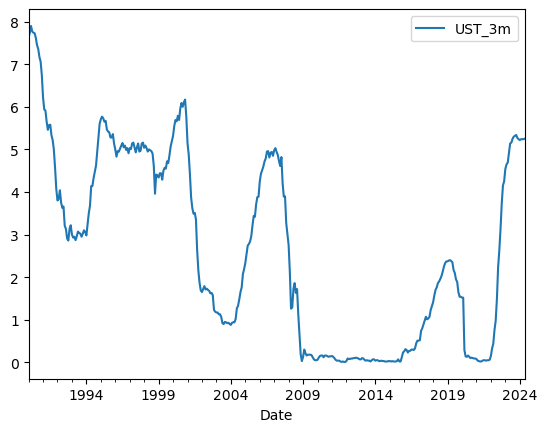

In [19]:
UST_3m_monthly.plot()

Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis (DGS1) - https://fred.stlouisfed.org/series/DGS1

In [21]:
# Careful FRED data saved in weird format! Need to save locally to xlsx

# Read nominal FX (US for EUR) data
UST_1Y_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/1Y_Yield_US_monthly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
UST_1Y_monthly.columns = ['Date', 'UST_1Y']

# Convert date column to datetime format
UST_1Y_monthly['Date'] = pd.to_datetime(UST_1Y_monthly['Date'])

# Set the date column as the index
UST_1Y_monthly.set_index('Date', inplace = True)

UST_1Y_monthly.head()


,UST_1Y
Date,
1990-01-01,7.920952
1990-02-01,8.111053
1990-03-01,8.350000
1990-04-01,8.404500
1990-05-01,8.316364


<Axes: xlabel='Date'>

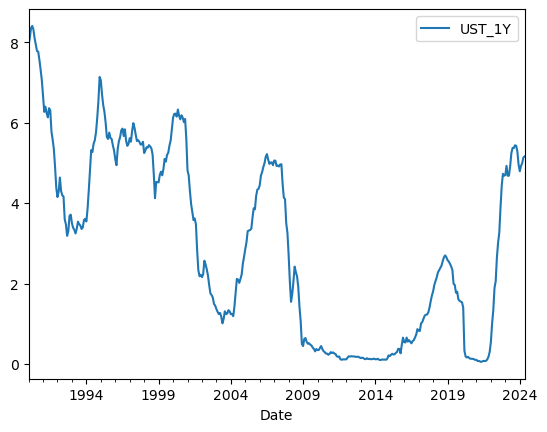

In [22]:
UST_1Y_monthly.plot()

## Regressions

In [24]:
# Merge dataset

# Concatenate all DataFrames along the columns and join them on the Date index
merged_df = pd.concat([Euro_1Y_monthly, Euro_3m_monthly, UST_1Y_monthly, UST_3m_monthly, Nominal_USEUR_monthly], axis=1, join='outer')

# Display the first few rows of the merged DataFrame
merged_df.head()

,Euro_1Y,Euro_3m,UST_1Y,UST_3m,Nominal_FX
Date,,,,,
1990-01-01,NaN,NaN,7.920952,7.64,0.8319
1990-02-01,NaN,NaN,8.111053,7.74,0.8208
1990-03-01,NaN,NaN,8.350000,7.90,0.8351
1990-04-01,NaN,NaN,8.404500,7.77,0.8251
1990-05-01,NaN,NaN,8.316364,7.74,0.8114


## 3-month

In [26]:
# Log transform the relevant columns
merged_df['log_Nominal_FX'] = np.log(merged_df['Nominal_FX'])
merged_df['log_UST_3m'] = np.log(merged_df['UST_3m'])
# merged_df['Euro_3m'].min() # Check min value to adjust log transformation
merged_df['log_Euro_3m'] = np.log(merged_df['Euro_3m'] + 0.86)

# Calculate the future spot exchange rate (3 months ahead)
merged_df['log_Nominal_FX_3m_ahead'] = merged_df['log_Nominal_FX'].shift(-3)

# Calculate the change in exchange rate (3 months ahead)
merged_df['change_log_FX'] = merged_df['log_Nominal_FX_3m_ahead'] - merged_df['log_Nominal_FX']

# Calculate the interest rate differential, adding min(=5.5) to allow log transformation
merged_df['interest_rate_diff'] = (merged_df['UST_3m'] - merged_df['Euro_3m'])
# merged_df['interest_rate_diff'].min()  # Check min value to adjust log transformation
merged_df['log_interest_rate_diff'] = np.log(merged_df['interest_rate_diff'] + 3.1)

<Axes: xlabel='Date'>

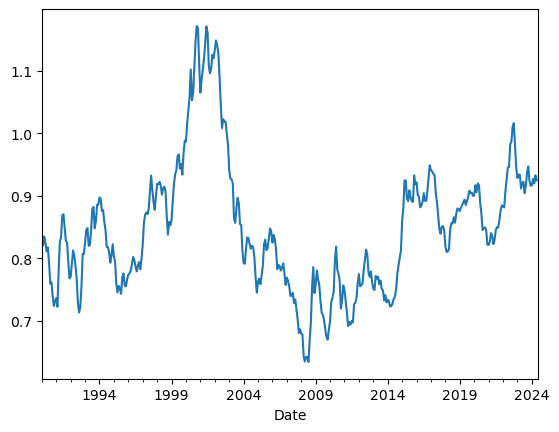

In [27]:
merged_df['Nominal_FX'].plot()

In [117]:
# Function to make multiple plots
def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None, title=None):
    # Filter DataFrame by date range if provided
    if start_date and end_date:
        mask = (df.index >= start_date) & (df.index <= end_date)
        df = df.loc[mask]

    # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
    plt.figure(figsize=(10, 6))
    plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

    # Add a linear trend line
    slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'])
    line = slope * df['log_interest_rate_diff'] + intercept
    plt.plot(df['log_interest_rate_diff'], line, color='brown')

    # Add titles and labels
    plt.title(title)
    plt.xlabel('3-month interest differential')
    plt.ylabel('3-month ex post depreciation')

    # Show the plot
    plt.grid(True)
    
    # Show the plot
    plt.show()



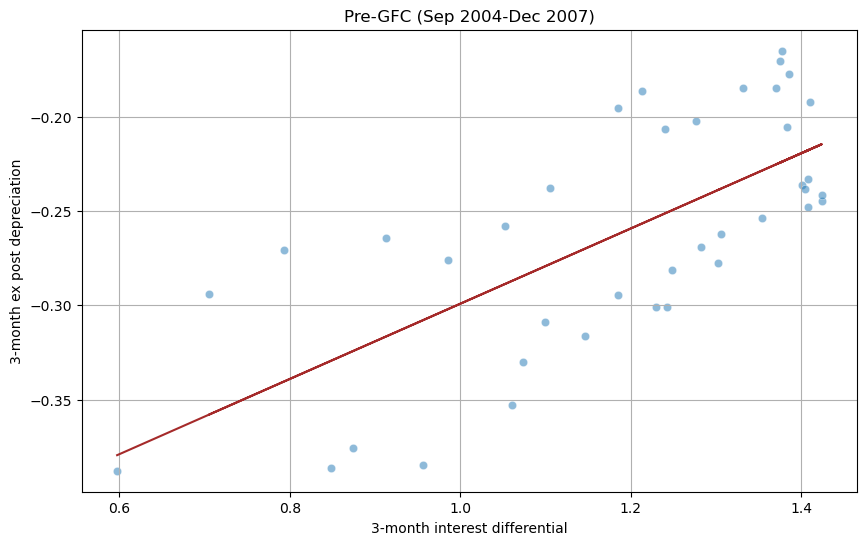

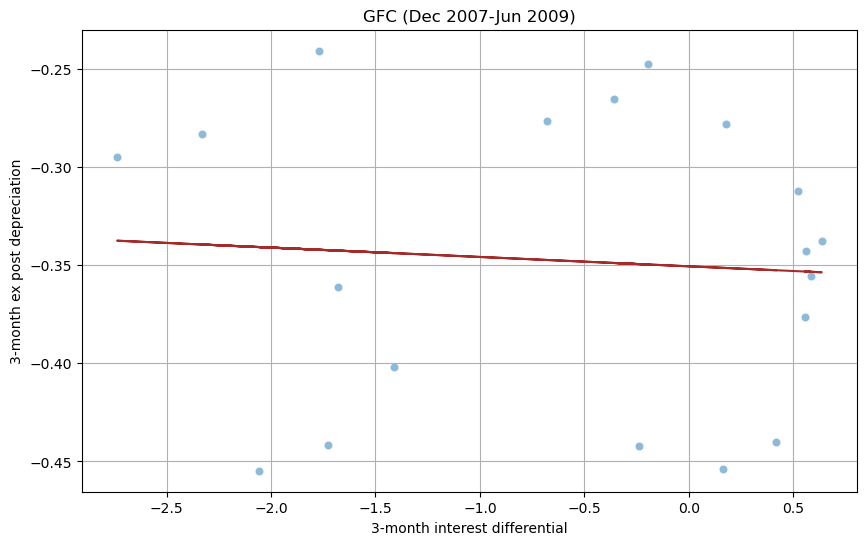

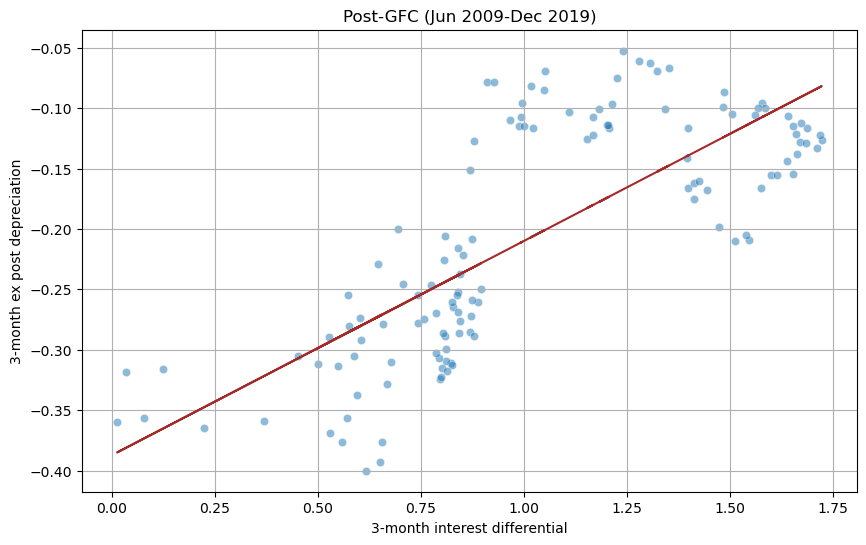

In [119]:
# Define the date ranges and titles
date_ranges = [
    ('2004-09-01', '2007-11-01'), # Start of pre-GFC date will depend on how far back the data goes
    ('2007-12-01', '2009-06-01'),
    ('2009-06-01', '2019-12-01')
]

# Titles for each period
titles = [
    "Pre-GFC (Sep 2004-Dec 2007)",
    "GFC (Dec 2007-Jun 2009)",
    "Post-GFC (Jun 2009-Dec 2019)"
]

# Plot for each date range
for (start_date, end_date), title in zip(date_ranges, titles):
    plot_interest_rate_diff_vs_fx(merged_df, start_date, end_date, title)

In [30]:
# # Function to plot data with optional date range
# def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None):
#     # Filter DataFrame by date range if provided
#     if start_date and end_date:
#         mask = (df.index >= start_date) & (df.index <= end_date)
#         df = df.loc[mask]

#     # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

#     # Add a linear trend line
#     slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'])
#     line = slope * df['log_interest_rate_diff'] + intercept
#     plt.plot(df['log_interest_rate_diff'], line, color='brown')

#     # Add titles and labels
#     plt.title('3-month ex post depreciation vs. 3-month US-euro area interest differential')
#     plt.xlabel('3-month US-euro area interest differential')
#     plt.ylabel('3-month ex post depreciation')

#     # Show the plot
#     plt.grid(True)
#     plt.show()

In [31]:
# # Example usage: Plot data for the year 2000
# plot_interest_rate_diff_vs_fx(merged_df, start_date='2007-09-01', end_date='2008-12-01')

In [32]:
def perform_regression_with_robust_se(merged_df, start_date, end_date):
    """
    Perform regression analysis on the given DataFrame within the specified date range.
    
    Parameters:
    merged_df (pd.DataFrame): The DataFrame containing the data.
    start_date (str): The start date for filtering the DataFrame (format 'YYYY-MM-DD').
    end_date (str): The end date for filtering the DataFrame (format 'YYYY-MM-DD').
    
    Returns:
    tuple: The intercept, coefficient of log_interest_rate_diff, and the fitted model.
    """
    # Drop NaN values that result from shifting
    merged_df = merged_df.dropna(subset=['change_log_FX', 'log_interest_rate_diff'])

    # Filter the DataFrame for the desired date range
    filtered_df = merged_df.loc[start_date:end_date]

    # Define the dependent and independent variables
    X = filtered_df['log_interest_rate_diff']
    y = filtered_df['change_log_FX']

    # Add a constant term for the intercept
    X = sm.add_constant(X)

    # Perform the regression with robust standard errors
    model = sm.OLS(y, X).fit(cov_type='HC1')

    # Return the intercept, coefficient of log_interest_rate_diff, and the model
    return model.params['const'], model.params['log_interest_rate_diff'], model

In [140]:
def plot_coefficients_and_intercepts(merged_df, date_ranges, custom_labels):
    intercepts = []
    coefficients = []
    date_labels = []

    for start_date, end_date in date_ranges:
        intercept, coefficient, model = perform_regression_with_robust_se(merged_df, start_date, end_date)
        intercepts.append(intercept)
        coefficients.append(coefficient)
        date_labels.append(f"{start_date} to {end_date}")

        # Print the regression results
        print(f"Regression results for {start_date} to {end_date}:")
        print(model.summary())
        print("\n" + "="*80 + "\n")
    
    # Plot the intercepts and coefficients in a bar chart
    x = range(len(date_ranges))
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot intercepts with a specific color
    bars1 = ax.bar(x, intercepts, width, label='Intercept', color='blue')

    # Plot coefficients with a specific color
    bars2 = ax.bar([p + width for p in x], coefficients, width, label='log_interest_rate_diff', color='red')

    # Adding labels
    ax.set_xlabel('Date Range')
    ax.set_ylabel('Value')
    ax.set_title('Intercept and log_interest_rate_diff estimated coefficients')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(custom_labels, rotation=45, ha='right')
    ax.legend()

    # Show plot with tight layout
    plt.tight_layout()
    plt.show()


Regression results for 2004-09-01 to 2007-12-01:
                            OLS Regression Results                            
Dep. Variable:          change_log_FX   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     34.01
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           9.68e-07
Time:                        18:13:09   Log-Likelihood:                 49.503
No. Observations:                  40   AIC:                            -95.01
Df Residuals:                      38   BIC:                            -91.63
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


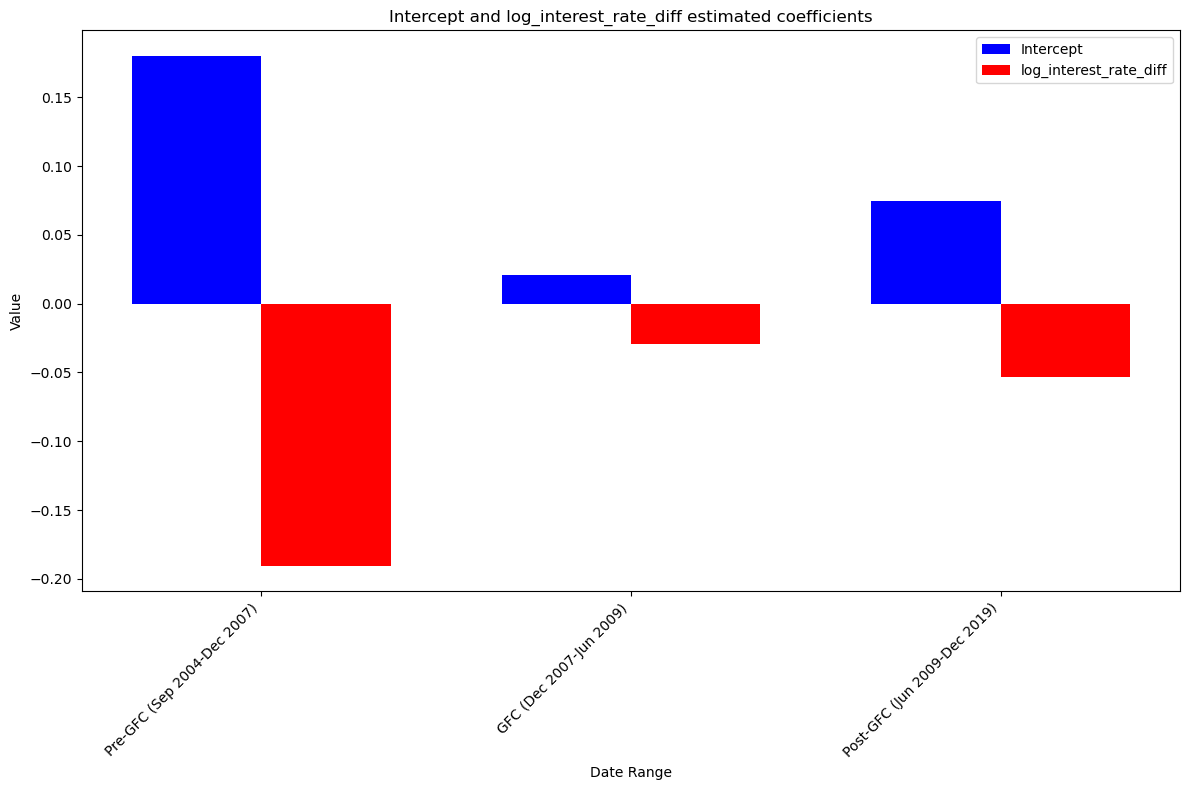

In [142]:
# Date ranges following NBER classification of recession

custom_lables = ["Pre-GFC (Sep 2004-Dec 2007)", "GFC (Dec 2007-Jun 2009)", "Post-GFC (Jun 2009-Dec 2019)"]
date_ranges = [
    ('2004-09-01', '2007-12-01'), # Start of pre-GFC date range will depend on data availability
    ('2007-12-01', '2009-06-01'),
    ('2009-06-01', '2019-12-01')
]

plot_coefficients_and_intercepts(merged_df, date_ranges, custom_lables)

## 1-year

In [36]:
# Log transform the relevant columns
merged_df['log_Nominal_FX'] = np.log(merged_df['Nominal_FX'])
# merged_df['log_UST_1Y'] = np.log(merged_df['UST_1Y'])
# merged_df['Euro_1Y'].min() # Check min value to adjust log transformation
merged_df['log_Euro_1Y'] = np.log(merged_df['Euro_1Y'] + 0.85)

# Calculate the future spot exchange rate (1 year ahead)
merged_df['log_Nominal_FX_1Y_ahead'] = merged_df['log_Nominal_FX'].shift(-12)

# Calculate the change in exchange rate (1 year ahead)
merged_df['change_log_FX'] = merged_df['log_Nominal_FX_1Y_ahead'] - merged_df['log_Nominal_FX']

# Calculate the interest rate differential, adding min(=5.5) to allow log transformation
merged_df['interest_rate_diff'] = (merged_df['UST_1Y'] - merged_df['Euro_1Y'])
# merged_df['interest_rate_diff'].min()
merged_df['log_interest_rate_diff'] = np.log(merged_df['interest_rate_diff'] + 2.2)

In [37]:
# # Function to make one plot
# def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None):
#     # Filter DataFrame by date range if provided
#     if start_date and end_date:
#         mask = (df.index >= start_date) & (df.index <= end_date)
#         df = df.loc[mask]

#     # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

#     # Add a linear trend line
#     slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'])
#     line = slope * df['log_interest_rate_diff'] + intercept
#     plt.plot(df['log_interest_rate_diff'], line, color='brown')

#     # Add titles and labels
#     plt.title('1-year ex post depreciation vs. 1-year US-euro area interest differential')
#     plt.xlabel('1-year US-euro area interest differential')
#     plt.ylabel('1-year ex post depreciation')

#     # Show the plot
#     plt.grid(True)
#     plt.show()

In [38]:
# Function to make multiple plots
def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None, title=None):
    # Filter DataFrame by date range if provided
    if start_date and end_date:
        mask = (df.index >= start_date) & (df.index <= end_date)
        df = df.loc[mask]

    # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
    plt.figure(figsize=(10, 6))
    plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

    # Add a linear trend line
    slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'])
    line = slope * df['log_interest_rate_diff'] + intercept
    plt.plot(df['log_interest_rate_diff'], line, color='brown')

    # Add titles and labels
    plt.title('1-year ex post depreciation vs. 1-year US-euro area interest differential')
    plt.xlabel('1-year US-euro area interest differential')
    plt.ylabel('1-year ex post depreciation')

    # Show the plot
    plt.grid(True)
    plt.show()

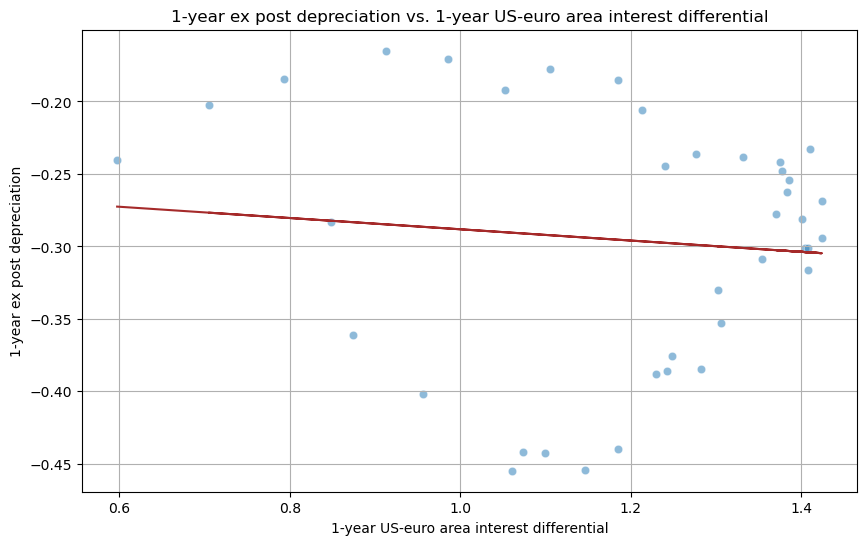

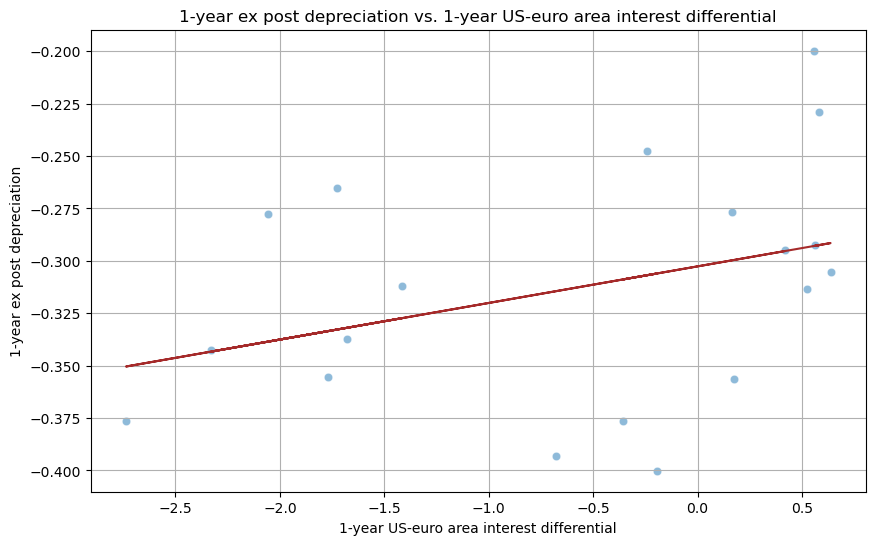

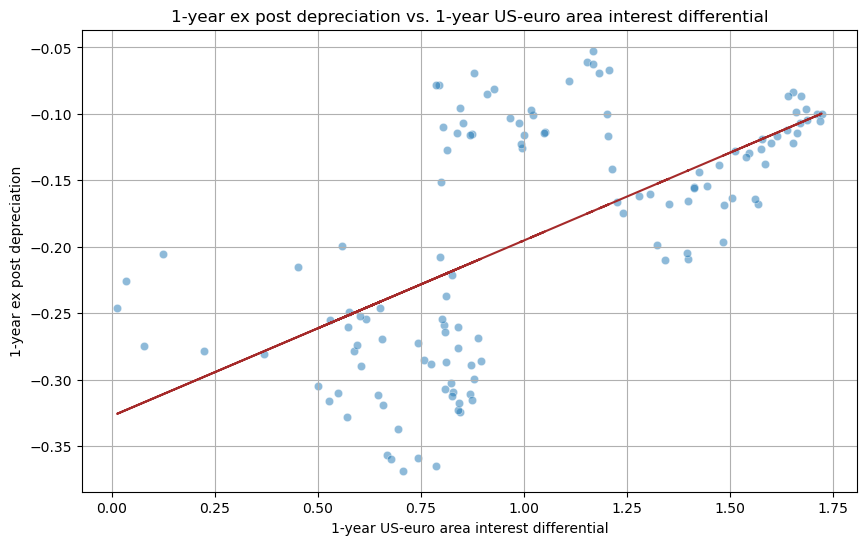

In [39]:
# Define the date ranges and titles
date_ranges = [
    ('2004-09-01', '2007-11-01'), # Start of pre-GFC date range will depend on data availability
    ('2007-12-01', '2009-06-01'),
    ('2009-06-01', '2019-12-01')
]

# Titles for each period
titles = [
    "Pre-GFC (Sep 2004-Dec 2007)",
    "GFC (Dec 2007-Jun 2009)",
    "Post-GFC (Jun 2009-Dec 2019)"
]

# Plot for each date range
for (start_date, end_date), title in zip(date_ranges, titles):
    plot_interest_rate_diff_vs_fx(merged_df, start_date, end_date, title)

In [40]:
def perform_regression_with_robust_se(merged_df, start_date, end_date):
    """
    Perform regression analysis on the given DataFrame within the specified date range.
    
    Parameters:
    merged_df (pd.DataFrame): The DataFrame containing the data.
    start_date (str): The start date for filtering the DataFrame (format 'YYYY-MM-DD').
    end_date (str): The end date for filtering the DataFrame (format 'YYYY-MM-DD').
    
    Returns:
    tuple: The intercept, coefficient of log_interest_rate_diff, and the fitted model.
    """
    # Drop NaN values that result from shifting
    merged_df = merged_df.dropna(subset=['change_log_FX', 'log_interest_rate_diff'])

    # Filter the DataFrame for the desired date range
    filtered_df = merged_df.loc[start_date:end_date]

    # Define the dependent and independent variables
    X = filtered_df['log_interest_rate_diff']
    y = filtered_df['change_log_FX']

    # Add a constant term for the intercept
    X = sm.add_constant(X)

    # Perform the regression with robust standard errors
    model = sm.OLS(y, X).fit(cov_type='HC1')

    # Return the intercept, coefficient of log_interest_rate_diff, and the model
    return model.params['const'], model.params['log_interest_rate_diff'], model

In [41]:
def plot_coefficients_and_intercepts(merged_df, date_ranges, custom_labels):
    intercepts = []
    coefficients = []
    date_labels = []

    for start_date, end_date in date_ranges:
        intercept, coefficient, model = perform_regression_with_robust_se(merged_df, start_date, end_date)
        intercepts.append(intercept)
        coefficients.append(coefficient)
        date_labels.append(f"{start_date} to {end_date}")

        # Print the regression results
        print(f"Regression results for {start_date} to {end_date}:")
        print(model.summary())
        print("\n" + "="*80 + "\n")
    
    # Plot the intercepts and coefficients in a bar chart
    x = range(len(date_ranges))
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot intercepts with a specific color
    bars1 = ax.bar(x, intercepts, width, label='Intercept', color='blue')

    # Plot coefficients with a specific color
    bars2 = ax.bar([p + width for p in x], coefficients, width, label='log_interest_rate_diff Coefficient', color='red')

    # Adding labels
    ax.set_xlabel('Date Range')
    ax.set_ylabel('Value')
    ax.set_title('Intercept and log_interest_rate_diff Coefficient over Different Date Ranges')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(custom_labels, rotation=45, ha='right')
    ax.legend()

    # Show plot with tight layout
    plt.tight_layout()
    plt.show()


Regression results for 2004-09-01 to 2007-12-01:
                            OLS Regression Results                            
Dep. Variable:          change_log_FX   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     34.01
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           9.68e-07
Time:                        17:39:26   Log-Likelihood:                 49.503
No. Observations:                  40   AIC:                            -95.01
Df Residuals:                      38   BIC:                            -91.63
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


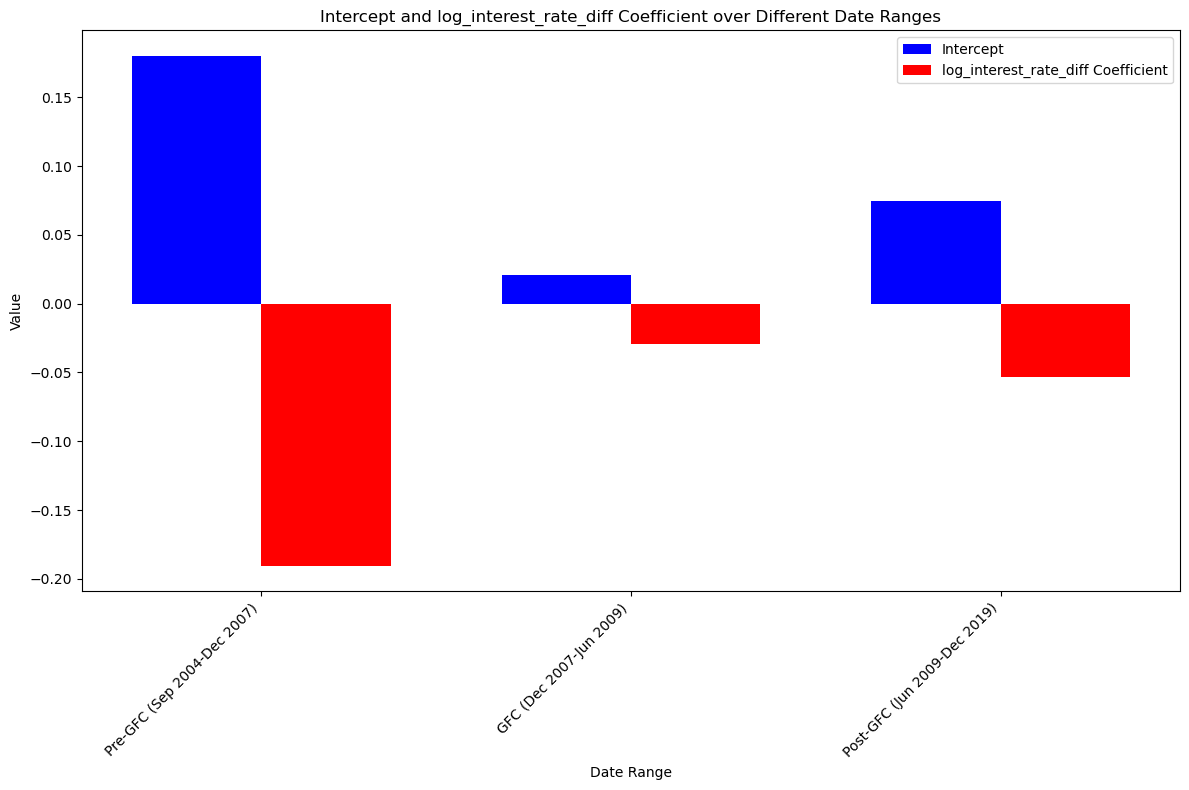

In [42]:
# Date ranges following NBER classification of recession

custom_lables = ["Pre-GFC (Sep 2004-Dec 2007)", "GFC (Dec 2007-Jun 2009)", "Post-GFC (Jun 2009-Dec 2019)"]
date_ranges = [
    ('2004-09-01', '2007-12-01'),
    ('2007-12-01', '2009-06-01'),
    ('2009-06-01', '2019-12-01')
]

plot_coefficients_and_intercepts(merged_df, date_ranges, custom_lables)